In [1]:
import pandas as pd
import numpy as np

In [2]:
base = "https://www.ncei.noaa.gov/pub/data/uscrn/products/subhourly01/"

In [3]:
column_names = ["WBANNO",
"UTC_DATE",
"UTC_TIME",
"LST_DATE",
"LST_TIME",
"CRX_VN",
"LONGITUDE",
"LATITUDE",
"AIR_TEMPERATURE",
"PRECIPITATION",
"SOLAR_RADIATION",
"SR_FLAG",
"SURFACE_TEMPERATURE",
"ST_TYPE",
"ST_FLAG",
"RELATIVE_HUMIDITY",
"RH_FLAG",
"SOIL_MOISTURE_5",
"SOIL_TEMPERATURE_5",
"WETNESS",
"WET_FLAG",
"WIND_1_5",
"WIND_FLAG"]
column_names = [x.lower() for x in column_names]

In [4]:
# df = pd.read_csv(f"{base}2020/CRNS0101-05-2020-AK_Aleknagik_1_NNE.txt", sep=' ', header=None, on_bad_lines="skip")

In [5]:
df = pd.read_csv("/Users/josephdespres/Downloads/CRNS0101-05-2022-AK_Aleknagik_1_NNE.txt", sep='\s+|t', header=None, engine='python') # on_bad_lines="skip"

df = df.dropna(axis='columns')
df.columns = column_names

In [7]:
df["utc_datetime"] = df.utc_date.astype(str) + "-" + df.utc_time.astype(str).apply(lambda x: x.zfill(3))
df["utc_datetime"] = pd.to_datetime(df.utc_datetime, format='%Y%m%d-%H%M')
df['ymd'] = df.utc_datetime.dt.year.astype(str) + "-" + df.utc_datetime.dt.month.astype(str) + "-" + df.utc_datetime.dt.day.astype(str)

In [8]:
tempature_date = df[["utc_datetime", "air_temperature", "ymd"]]
tempature_date.set_index("utc_datetime", inplace=True)
tempature_date.sort_values("utc_datetime",inplace=True)

/Users/josephdespres/my_env/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [9]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [18]:

temp = tempature_date.air_temperature

def hampel(x,k, t0=3):
    '''
    quick outlier detection and replacement
    '''
    n = len(x)
    y = x #y is the corrected series
    L = 1.4826
    for i in range((k + 1),(n - k)):
        if np.isnan(x[(i - k):(i + k+1)]).all():
            continue
        x0 = np.nanmedian(x[(i - k):(i + k+1)])
        S0 = L * np.nanmedian(np.abs(x[(i - k):(i + k+1)] - x0))
        if (np.abs(x[i] - x0) > t0 * S0):
            y[i] = x0
    return(y)

tempature_date["air_temperature"] = hampel(temp, k=6)

/var/folders/0n/gp39qxl100149ccbr1n65kzh0000gn/T/ipykernel_62848/1189456413.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = x0
/var/folders/0n/gp39qxl100149ccbr1n65kzh0000gn/T/ipykernel_62848/1189456413.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempature_date["air_temperature"] = hampel(temp, k=6)


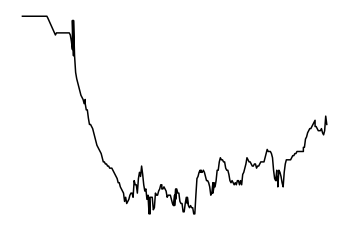

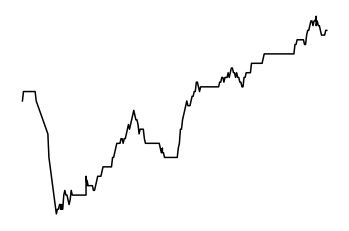

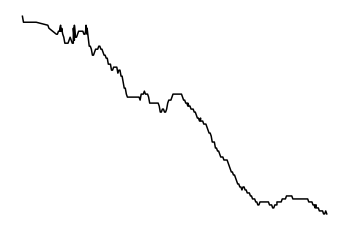

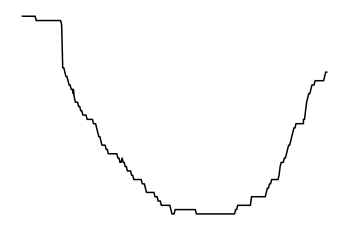

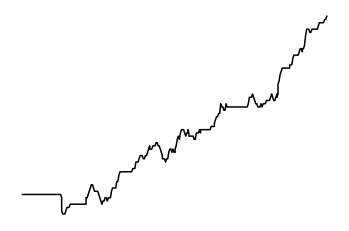

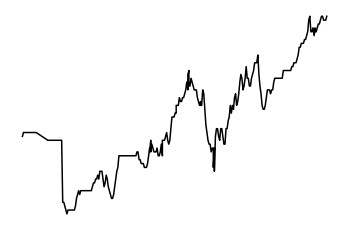

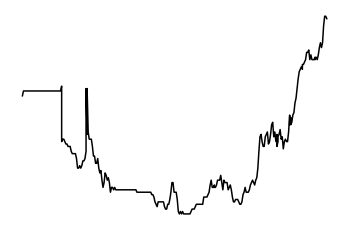

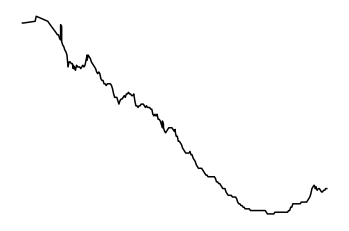

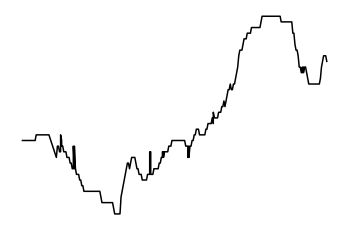

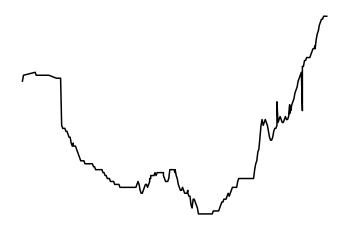

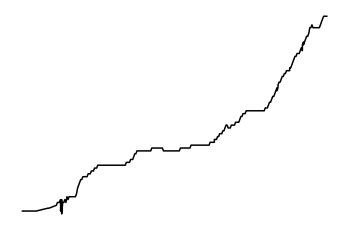

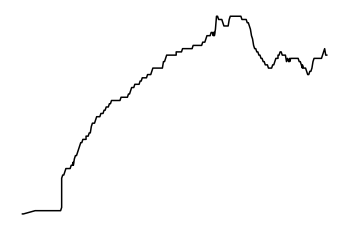

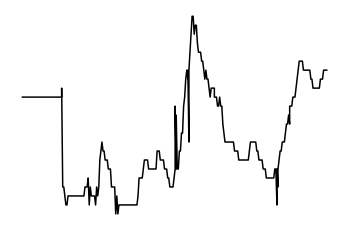

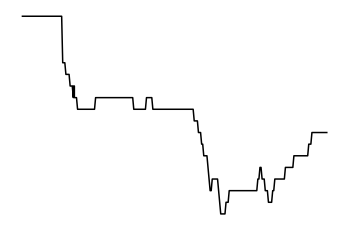

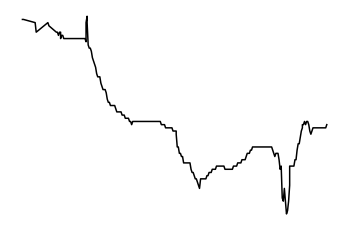

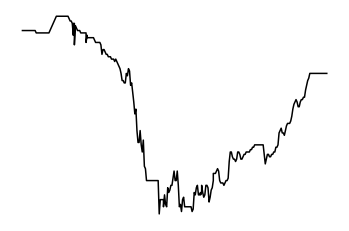

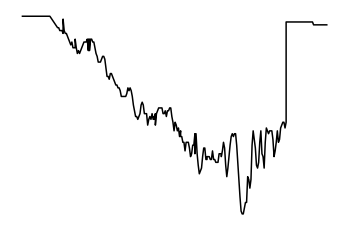

In [22]:
for day in tempature_date.ymd.unique():
    tmp = tempature_date[tempature_date.ymd == day]
    
    # fig, ax = plt.subplot()
    figure = plt.figure()
    ax = figure.add_subplot(1, 1, 1)
    ax.plot(tmp.index, tmp.air_temperature, 'black')
    ax.xaxis.set_major_formatter( DateFormatter('%H:%M') )
    plt.axis('off')
    plt.savefig(f"pics/{day}.png", bbox_inches='tight')
    plt.show()